In [1]:
import pandas as pd
pm25 = pd.read_csv("./data/pm2.csv")
pm25.head()

,RANK,CITY_ID,CITY_NAME,Exposed days
0,1,594,拉萨,2
1,2,579,玉溪,7
2,3,263,厦门,8
3,4,267,泉州,9
4,5,271,漳州,10


In [2]:
import numpy as np
pm25['bdays'] = np.where(pm25['Exposed days']>pm25['Exposed days'].mean(), 1, 0)
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,bdays
208,231,39,阳泉,155,1
233,256,343,莱芜,193,1
211,234,390,武汉,158,1
247,270,9,唐山,205,1
1,2,579,玉溪,7,0
0,1,594,拉萨,2,0
262,285,13,邯郸,253,1
175,198,545,遂宁,129,1
165,188,542,绵阳,123,1
219,242,601,渭南,170,1


In [3]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=pm25['Exposed days'].mean())
result = bn.fit_transform(pm25['Exposed days'])
pm25['sk-bdays'] = result
pm25.sample(10)

ValueError: Expected 2D array, got 1D array instead:
array=[  2   7   8   9  10  10  11  12  15  16  16  18  18  19  21  24  26  27
  28  28  30  31  32  32  33  34  34  35  40  44  45  45  45  46  47  47
  47  47  48  48  49  49  49  49  50  50  51  52  52  54  56  57  57  57
  58  58  59  60  61  62  62  62  63  63  63  64  65  65  65  66  67  69
  69  70  71  71  71  71  72  72  74  75  75  77  77  77  78  78  80  80
  80  81  82  84  85  85  85  85  85  86  86  87  87  87  88  88  88  88
  88  89  89  90  90  90  90  91  91  91  93  94  94  94  94  95  96  96
  96  96  97  97  97  98  98  99 100 101 102 103 103 104 104 105 106 108
 108 108 109 110 110 110 112 114 114 115 115 115 116 119 119 119 120 121
 121 123 123 123 124 124 125 126 126 126 128 128 128 129 130 130 130 132
 132 132 132 132 135 136 137 137 138 138 138 139 140 140 141 143 144 144
 145 147 148 148 148 149 149 150 154 154 155 158 158 158 161 162 166 166
 169 170 170 170 172 175 175 176 176 178 183 184 186 186 188 190 191 193
 193 194 196 196 197 198 199 200 201 203 203 203 204 205 205 210 211 213
 216 221 222 234 236 238 240 241 246 252 253 279].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [4]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=pm25['Exposed days'].mean())
result = bn.fit_transform(pm25[['Exposed days']])
pm25['sk-bdays'] = result
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,bdays,sk-bdays
174,197,598,宝鸡,128,1,1
223,246,256,亳州,176,1,1
258,281,345,德州,240,1,1
83,92,302,抚州,77,0,0
25,28,232,舟山,34,0,0
106,118,146,鹤岗,88,0,0
142,159,220,湖州,106,0,0
82,91,464,佛山,75,0,0
71,79,55,吕梁,69,0,0
135,148,163,绥化,101,0,0


In [5]:
pm25[['Exposed days']].shape

(264, 1)

In [6]:
pm25['Exposed days'].shape

(264,)

In [7]:
pm25['Exposed days'].values.reshape((-1, 1)).shape

(264, 1)

In [8]:
from sklearn.preprocessing import binarize
fbin = binarize(pm25[['Exposed days']], threshold=pm25['Exposed days'].mean())
fbin[[1, 50, 100, 150, 200]]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [9]:
gau = np.random.normal(loc=0, scale=1.0, size=100)
gau

array([-7.02235811e-01, -1.01213199e-01,  1.31824767e+00, -3.36023004e-01,
        1.52565992e+00,  1.97164760e+00, -2.30626334e+00,  3.94712157e-01,
       -3.48053777e-01,  8.99139352e-01,  1.45080409e+00, -1.98531041e-01,
        1.74328114e+00, -1.08188576e+00, -3.67024044e-01,  2.99576249e-01,
       -7.91892285e-01,  3.68466461e-01, -1.54718637e+00,  1.66237764e+00,
       -3.69575116e-01,  9.22725103e-02, -1.01479091e-01,  1.68118907e+00,
       -2.90676234e-01, -1.66307028e-01, -4.31409675e-01,  3.24387528e-01,
        4.75961610e-01, -1.75962412e+00,  1.35313092e+00,  1.00871804e-01,
       -7.93206897e-01, -7.56832912e-01,  8.45212286e-01, -3.40134790e-01,
       -5.90276914e-02,  8.01857220e-01, -4.45286887e-01, -8.40523946e-01,
       -1.91996778e+00, -9.51618993e-01,  4.61913510e-01,  1.31206066e+00,
        3.20316290e-02,  1.42856168e-01, -9.87931889e-01,  3.96949530e-01,
       -2.08559067e-01,  3.73255837e-02, -6.78810971e-01,  3.26533633e-01,
        1.12036328e+00,  

In [10]:
gau_bin = Binarizer().fit_transform(gau.reshape(-1, 1))
gau_bin

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],

In [11]:
gau_bin.reshape(1, -1)[0]

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.])

# 项目描述

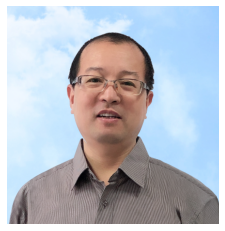

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
# 写一个专门在Jupyter中显示图像的函数
def show_img(img):
    if len(img.shape) == 3:
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    
laoqi = cv2.imread("./data/laoqi.png")
show_img(laoqi)

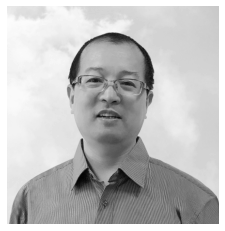

In [13]:
gray_laoqi = cv2.cvtColor(laoqi, cv2.COLOR_BGR2GRAY)
show_img(gray_laoqi)

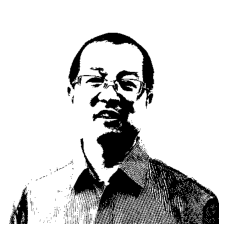

In [14]:
ret, thr = cv2.threshold(gray_laoqi, 127, 255, cv2.THRESH_BINARY)
show_img(thr)

# 动手练习

In [15]:
marathon = pd.read_csv("./data/marathon.csv")
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [16]:
marathon.describe()

,age
count,37250.000000
mean,40.697369
std,10.220043
min,17.000000
25%,33.000000
50%,40.000000
75%,48.000000
max,86.000000


In [17]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     37250 non-null  int64 
 1   gender  37250 non-null  object
 2   split   37250 non-null  object
 3   final   37250 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [19]:
marathon['split_time'] = marathon['split'].to_timestamp()
marathon.head()

TypeError: unsupported Type RangeIndex

In [20]:
def parse_time(time_string):
    time = time_string.split(":")
    time = [int(t) for t in time]
    time = time[0]*60*60 + time[1]*60 + time[2]
    return time
marathon['split_time'] = marathon['split'].apply(parse_time)
marathon['final_time'] = marathon['final'].apply(parse_time)
marathon.head()

,age,gender,split,final,split_time,final_time
0,33,M,01:05:38,02:08:51,3938,7731
1,32,M,01:06:26,02:09:28,3986,7768
2,31,M,01:06:49,02:10:42,4009,7842
3,38,M,01:06:16,02:13:45,3976,8025
4,31,M,01:06:32,02:13:59,3992,8039


In [21]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         37250 non-null  int64 
 1   gender      37250 non-null  object
 2   split       37250 non-null  object
 3   final       37250 non-null  object
 4   split_time  37250 non-null  int64 
 5   final_time  37250 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.7+ MB


In [22]:
marathon['frac'] = 1 - 2 * marathon['split_time'] / marathon['final_time']
marathon.head()

,age,gender,split,final,split_time,final_time,frac
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443
3,38,M,01:06:16,02:13:45,3976,8025,0.009097
4,31,M,01:06:32,02:13:59,3992,8039,0.006842


In [23]:
marathon['split_frac'] = np.where(marathon['frac']>0, 0, 1)
marathon.head()

,age,gender,split,final,split_time,final_time,frac,split_frac
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756,1
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262,1
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443,1
3,38,M,01:06:16,02:13:45,3976,8025,0.009097,0
4,31,M,01:06:32,02:13:59,3992,8039,0.006842,0


In [24]:
marathon['sk_split_frac'] = Binarizer().fit_transform(marathon[['frac']])
marathon.head()

,age,gender,split,final,split_time,final_time,frac,split_frac,sk_split_frac
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756,1,0.0
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262,1,0.0
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443,1,0.0
3,38,M,01:06:16,02:13:45,3976,8025,0.009097,0,1.0
4,31,M,01:06:32,02:13:59,3992,8039,0.006842,0,1.0


In [25]:
# 参考答案
import datetime
def convert_time(s):
    h, m, s = map(int, s.split(":"))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

marathon = pd.read_csv("./data/marathon.csv",
                      converters={"split": convert_time,
                                 "final": convert_time})
marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [26]:
marathon['split'] = marathon['split'].astype(int) * 1e-9
marathon['final'] = marathon['final'].astype(int) * 1e-9
marathon.head()

,age,gender,split,final
0,33,M,3938.0,7731.0
1,32,M,3986.0,7768.0
2,31,M,4009.0,7842.0
3,38,M,3976.0,8025.0
4,31,M,3992.0,8039.0


In [28]:
marathon['frac'] = 1 - 2 * marathon['split'] / marathon['final']
marathon.head()

,age,gender,split,final,frac
0,33,M,3938.0,7731.0,-0.018756
1,32,M,3986.0,7768.0,-0.026262
2,31,M,4009.0,7842.0,-0.022443
3,38,M,3976.0,8025.0,0.009097
4,31,M,3992.0,8039.0,0.006842


In [29]:
marathon['split_frac'] = np.where(marathon['frac']>0, 0, 1)
marathon.sample(10)

,age,gender,split,final,frac,split_frac
26634,46,M,8019.0,19247.0,0.166727,0
7344,60,M,7073.0,13870.0,-0.019899,1
29299,51,M,7967.0,20107.0,0.207540,0
29,31,M,4447.0,8719.0,-0.020071,1
25960,24,W,8169.0,19047.0,0.142227,0
1197,44,M,5288.0,11022.0,0.040465,0
26411,58,M,7771.0,19176.0,0.189508,0
32469,46,M,8381.0,21567.0,0.222794,0
1004,48,M,5194.0,10835.0,0.041255,0
24259,55,M,7295.0,18601.0,0.215634,0
